# King County Real Estate 
***

![seattle sky line](./Photos/Seattle-Skyline2.jpeg)

**Author:** [Emmi Galfo](mailto:emmi.galfo@gmail.com)
***

## Overview 
***

This project looks at factors that influence price in the King County real estate market. Through linear regression modeling, predictors such as square footage, number of bedrooms, number of bathrooms, condition, grade, and views were factored in to determine their effects on housing price. 

## Business Problem
***
A real estate agent is helping a couple find a house in King County. In order to stay within a set budget, the couple is interested in seeing how different factors affect overall price. This project looks at the following variables and their affect on the price of buying a house in King County, Washington:
*  Square Footage
*  Number of Bedrooms
*  Number of Bathrooms
*  House Condition
*  House Grade
*  Quality of the View


## Data Understanding
***

For this project, data was gathered and used from the King County assessor's website. Below are descriptions taken from the database describing each column.  

### Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).


In [1]:
#import standard packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline


In [2]:
# Load dataset
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# Look at the data types for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
#get a general sense of the statistics for the columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


## Data Preparation
***

### Target: 
The target variable for this project is __price__. The clients want to know how much certain factors will contribute to the overall price of a house. 
Let's look at the correlation each factor has with price. 

In [5]:
#Look at the correlation between price and other factors 
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
lat              0.063632
long            -0.022509
id              -0.034184
Name: price, dtype: float64

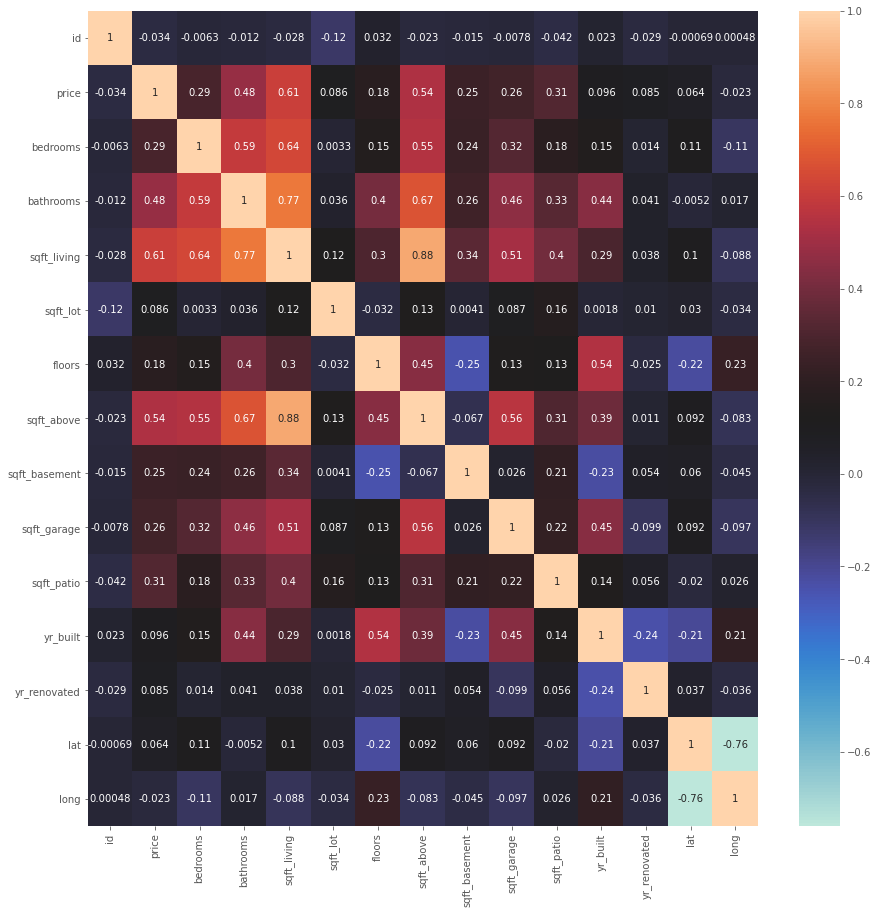

In [6]:
#Heatmap of all columns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="icefire");

Using the correlations above I see two things:
* The heatmap shows that square footage of living space and above grade square footage are strongly correlated with each other. This makes sense; it follows that the more above grade square footage, the more square footage of living space. In order to avoid multicollinearity, only one of these factors should be used. Square footage of living space has a higher correlation than above grade square footage. So when looking at square footage, I will use this one as one of the predictors.  
* Of the factors that the clients are intersted in looking at, square footage of living space has the highest correlation with price. This is a good place to start for the baseline model. 


### Predictors: 

The predictors that the clients are most intersted in are __square footage of living area, number of bathrooms, number of bedrooms, condition of the home, grade of the home, and quality of views__. 

## Baseline Model: Square Footage
***

I will use square footage of living space as my factor for my baseline model because it is relevent to the business problem and has the highest correlation with the target variable, price. 

In [7]:
#baseline model using only square footage and price
import statsmodels.api as sm
y = df["price"]
X_baseline = df[["sqft_living"]]
model_results = sm.OLS(y, sm.add_constant(X_baseline)).fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:57:33   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

##### Interpretation
The model is significant overall. The model explains 37% of the variance in price. 
The constant and coefficient are both significant. 

The constant is a bit non-sensical at this point stating that a home with no square footage would cost -74k USD. 

The model shows that for every square foot in living area, the price goes up by about 560 USD. 
This may seem expensive but it is consistent with a mean square footage of 2,112 and a mean price of 1.1 million USD.

Overall, I don't think this is a very good model because it only explains 37% of the variance.

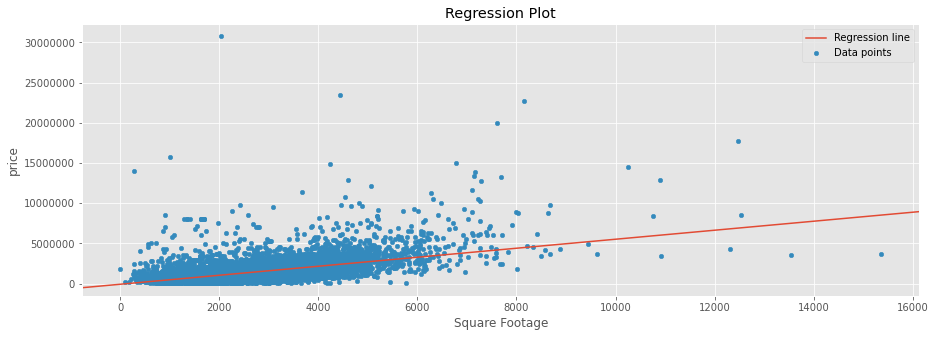

In [8]:
# Plot the model fit (scatter plot and regression line)
fig, ax = plt.subplots(figsize=(15,5))
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
ax.ticklabel_format(style='plain')
sm.graphics.abline_plot(model_results = model_results, label="Regression line", ax=ax)
ax.set_title("Regression Plot")
ax.set_xlabel("Square Footage")
ax.legend();

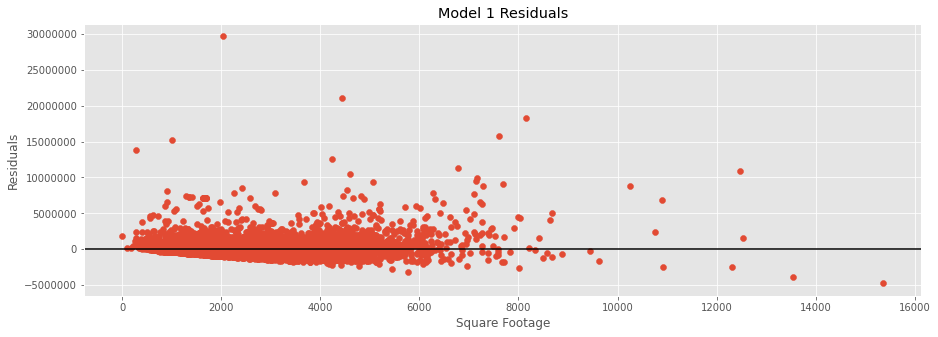

In [9]:
# Plot the model residuals
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df["sqft_living"], model_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Square Footage")
ax.set_ylabel("Residuals")
ax.set_title("Model 1 Residuals")
ax.ticklabel_format(style='plain');

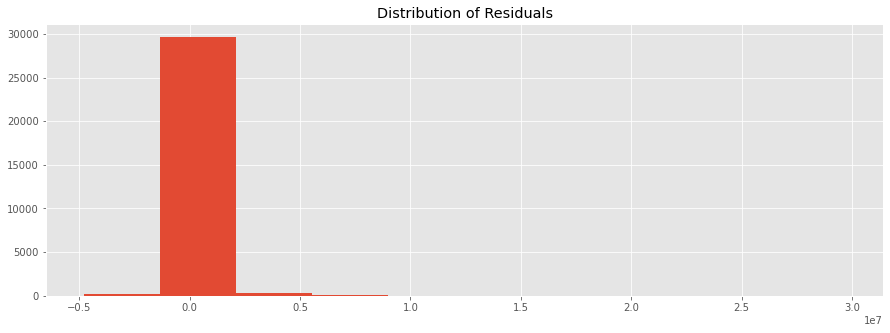

In [10]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(model_results.resid)
ax.set_title("Distribution of Residuals");

## Second Model: Square Footage, Bedrooms, Bathrooms
***

### Adding additional numerical factors: 

Three of the six factors we are considering are numeric: square footage, bedrooms, and bathrooms. 


''

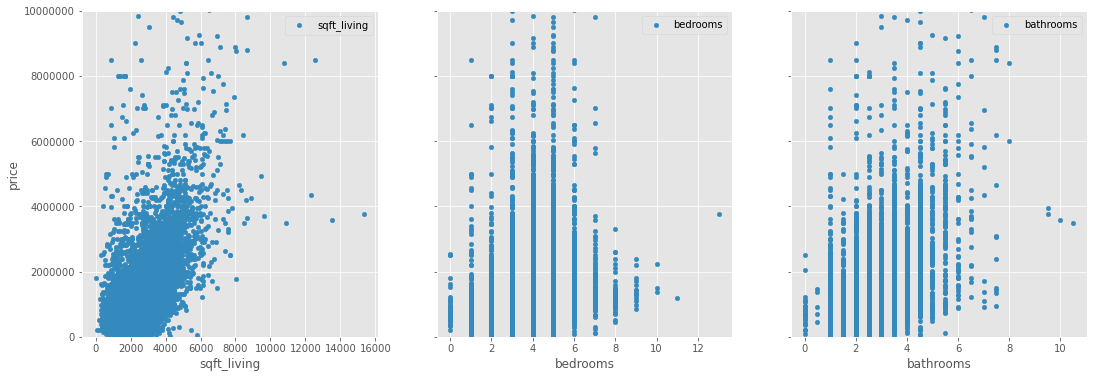

In [11]:
#Look at the scatterplots of numeric factors in regards to price. 
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18,6))
for idx, channel in enumerate(["sqft_living", "bedrooms", "bathrooms"]):
    df.plot(kind="scatter", x=channel, y="price", ax=axs[idx], label=channel)
    axs[idx].legend()
    axs[idx].set_ylim([0, 10000000])
    axs[idx].ticklabel_format(style='plain')
;


Just by looking at the graphs, it seems that square footage of living space, bedrooms, and bathrooms have positive correlations. Though bedrooms looks a little weaker. This is consistent with what the heatmap showed previously. 

In [12]:
#Create model with all three numerical factors
y = df["price"]
X = df[["sqft_living", "bedrooms", "bathrooms"]]
model_results = sm.OLS(y, sm.add_constant(X)).fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     6388.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:57:35   Log-Likelihood:            -4.4868e+05
No. Observations:               30155   AIC:                         8.974e+05
Df Residuals:                   30151   BIC:                         8.974e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.017e+05   1.51e+04     13.331      

##### Interpretation
The model is significant overall. The model explains ~39% of the variance in price. The constant and coefficients are all significant. 

The constant shows a starting value of 201k USD. For King County, this seems reasonable. 

The model shows that for every additional sqare foot in living area, the price goes up by about 616 USD all else constant. 

Adding bedrooms brings down the price of the house by about -162K per bedroom, all else constant. 

For each bathroom the house price goes up by about 68k per bathroom, all else constant. 

Overall, the model seems weak with only explaining 39% of variance in price.

## Third Model: Square Footage, Bedrooms, Bathrooms, Grade, View, Condition
***

The categorical data we will be looking at includes grade, condition, and views. Let's look at each variable and it's description from the data base. 

### Grade

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [13]:
#Initial look at each category's mean price
df.groupby("grade")["price"].mean().sort_values(ascending=False)

grade
13 Mansion       7.399048e+06
12 Luxury        5.088029e+06
11 Excellent     3.542308e+06
10 Very Good     2.341987e+06
9 Better         1.586307e+06
1 Cabin          1.352500e+06
8 Good           1.083520e+06
7 Average        8.201276e+05
6 Low Average    6.539746e+05
4 Low            6.388057e+05
5 Fair           6.186138e+05
3 Poor           4.644615e+05
2 Substandard    3.025000e+05
Name: price, dtype: float64

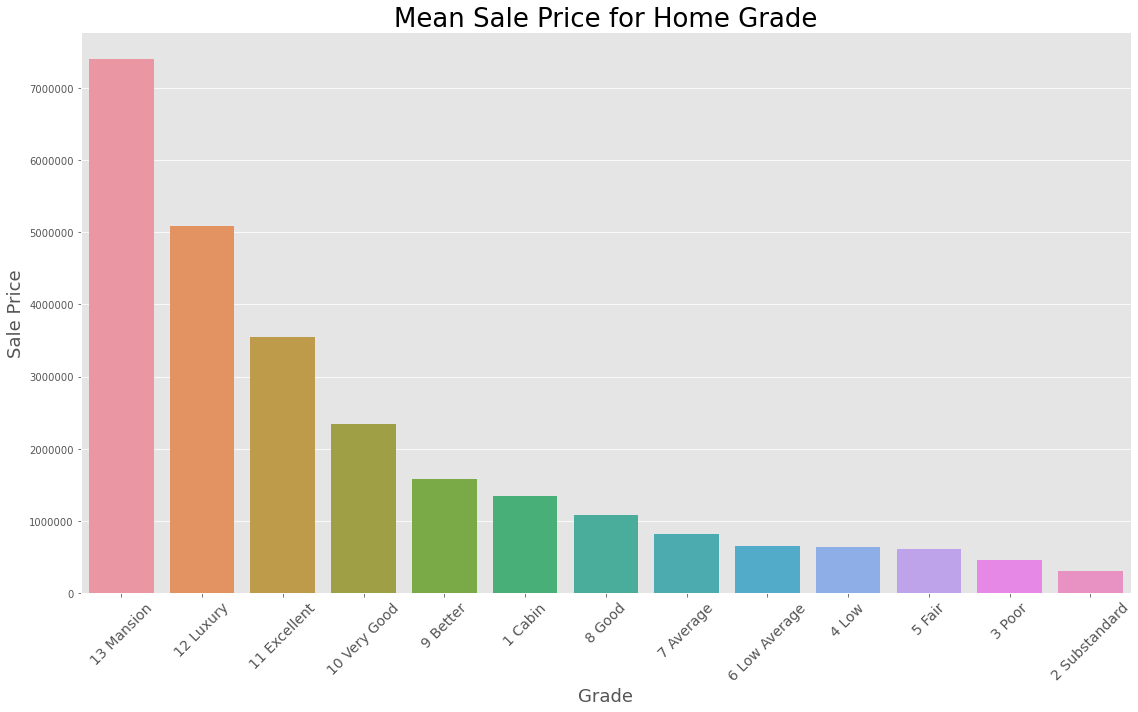

In [14]:
mean_grade = df.groupby("grade")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=mean_grade.reset_index(), x="grade", y="price")
plt.xlabel('Grade', fontsize= 18)
plt.ylabel('Sale Price', fontsize=18)
plt.xticks(rotation= 45, fontsize=14)
plt.title("Mean Sale Price for Home Grade", fontsize=26)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show();

*A note for modeling: one column needs to be dropped to avoid the dummy trap. I will drop cabin as it's one of the most inferior grades and is most likely not what the clients would be looking for. When it's dropped, cabin will become the reference column.*

### Condition

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [15]:
df.groupby("condition")["price"].mean().sort_values(ascending=False)

condition
Average      1.134336e+06
Very Good    1.130726e+06
Good         1.053242e+06
Fair         7.799337e+05
Poor         6.482829e+05
Name: price, dtype: float64

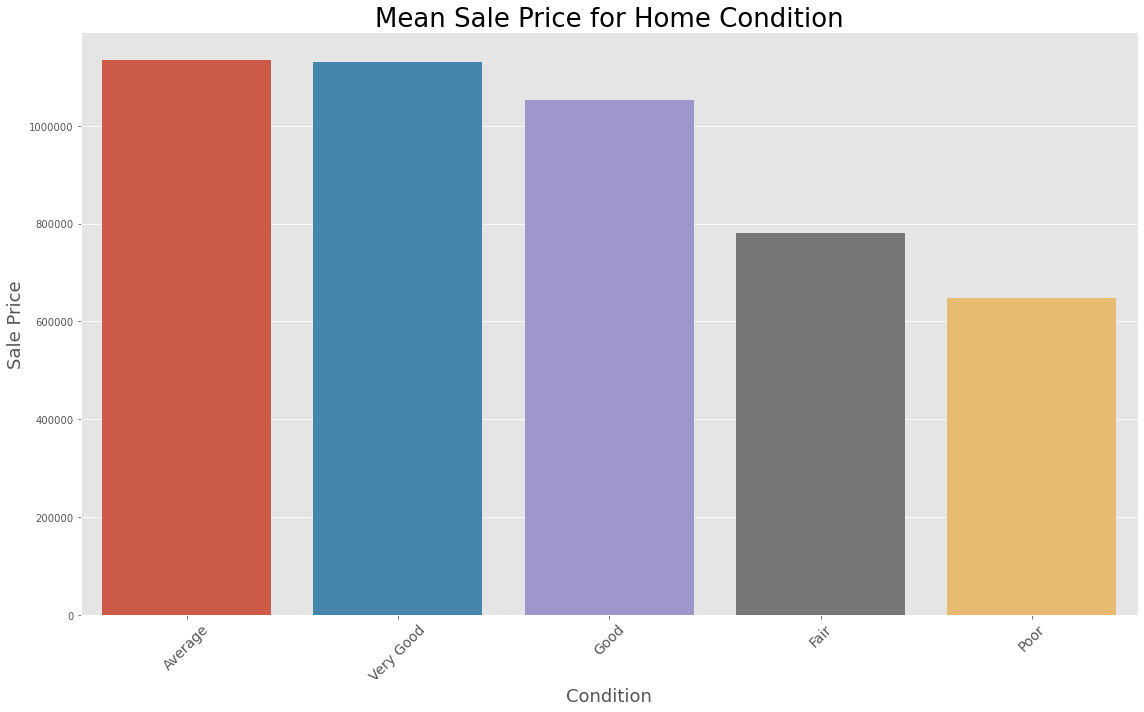

In [16]:
mean_condition = df.groupby("condition")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=mean_condition.reset_index(), x="condition", y="price")
plt.xlabel('Condition', fontsize= 18)
plt.ylabel('Sale Price', fontsize=18)
plt.xticks(rotation= 45, fontsize=14)
plt.title("Mean Sale Price for Home Condition", fontsize=26)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show();

*Again, a column will need to be dropped in order to avoid multicollinearity. The column that makes the most sense to be dropped for condition is poor because our clients will not be interested in these homes. In the model, poor will be the reference column.*

### View

Quality of view from house
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other

In [17]:
df.groupby("view")["price"].mean().sort_values(ascending=False)

view
EXCELLENT    2.994147e+06
FAIR         1.742069e+06
GOOD         1.736416e+06
AVERAGE      1.451993e+06
NONE         1.018607e+06
Name: price, dtype: float64

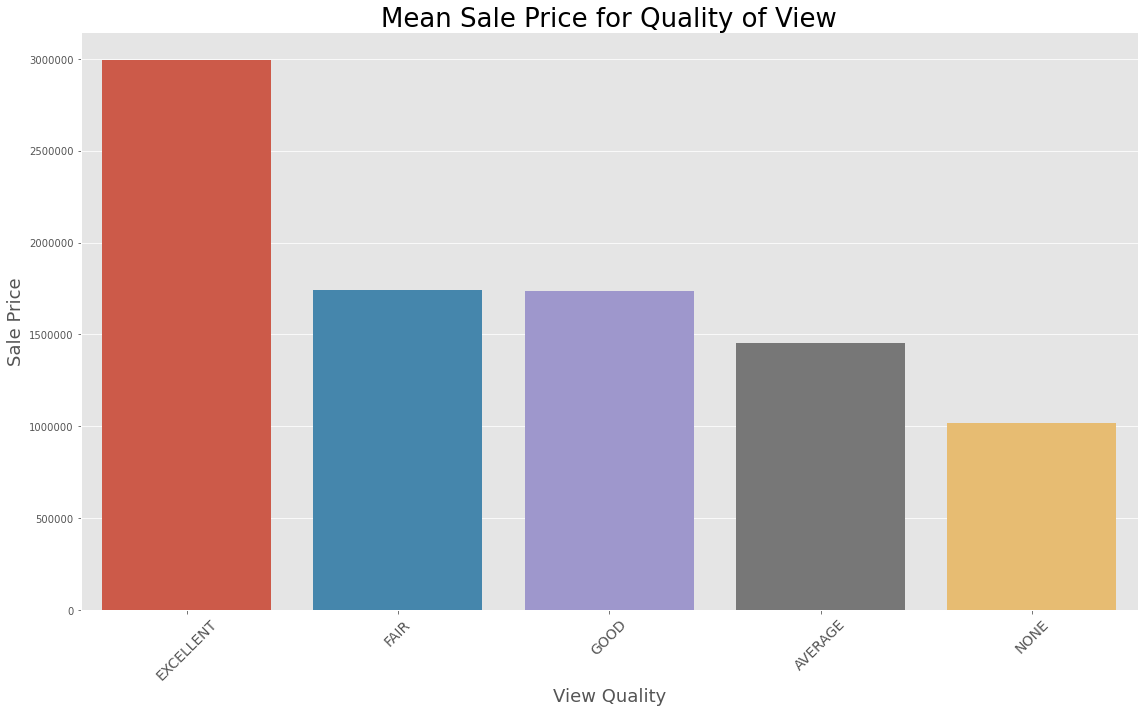

In [18]:
mean_view = df.groupby("view")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=mean_view.reset_index(), x="view", y="price")
plt.xlabel('View Quality', fontsize= 18)
plt.ylabel('Sale Price', fontsize=18)
plt.xticks(rotation= 45, fontsize=14)
plt.title("Mean Sale Price for Quality of View", fontsize=26)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show();

*The view column, NONE, will be dropped to avoid the dummy trap. NONE will become the reference column.*

### One Hot Encoding

At this point, the data frame is rather large and consists of columns that are not needed. I will make a new data frame that keeps only the columns being used and then one hot encode the categorical columns. 

In [19]:
#Make a new data frame with only necessary columns
king = df[["price","grade", "condition", "view", "sqft_living", "bedrooms", "bathrooms"]]

In [20]:
#one hot encoding
king = pd.get_dummies(king)
king.head()

,price,sqft_living,bedrooms,bathrooms,grade_1 Cabin,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,...,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,675000.0,1180,4,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,920000.0,2770,5,2.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,311000.0,2880,6,2.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,775000.0,2160,3,3.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,592500.0,1120,2,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [21]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                30155 non-null  float64
 1   sqft_living          30155 non-null  int64  
 2   bedrooms             30155 non-null  int64  
 3   bathrooms            30155 non-null  float64
 4   grade_1 Cabin        30155 non-null  uint8  
 5   grade_10 Very Good   30155 non-null  uint8  
 6   grade_11 Excellent   30155 non-null  uint8  
 7   grade_12 Luxury      30155 non-null  uint8  
 8   grade_13 Mansion     30155 non-null  uint8  
 9   grade_2 Substandard  30155 non-null  uint8  
 10  grade_3 Poor         30155 non-null  uint8  
 11  grade_4 Low          30155 non-null  uint8  
 12  grade_5 Fair         30155 non-null  uint8  
 13  grade_6 Low Average  30155 non-null  uint8  
 14  grade_7 Average      30155 non-null  uint8  
 15  grade_8 Good         30155 non-null 

In [22]:
#Drop specified columns to avoid dummy variable trap
king.drop(["grade_1 Cabin", "condition_Poor", "view_NONE"], axis=1, inplace=True)

In [23]:
#create model 
y = king["price"]
X = king.drop(["price"], axis=1)
model_results = sm.OLS(y, sm.add_constant(X)).fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1295.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:57:35   Log-Likelihood:            -4.4573e+05
No. Observations:               30155   AIC:                         8.915e+05
Df Residuals:                   30131   BIC:                         8.917e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.226e+06   4

##### Interpretation
The model is significant overall. The model explains about 50% of the variance in price. 

The constant and most of the predictors are significant at an alpha level of 0.05. 


 

*Adding the categorical data increased the R-squared value from ~39% to ~50%! 
This is definitely a step in the right direction.  
Outliers can throw off our data. We should look to see if there are any outliers, and then remove them to help improve the model.* 

## Fourth Model: Remove Outliers in Price
***

In [24]:
#Check shape before removing rows:
king.shape

(30155, 24)

In [25]:
#create an outliers function
def remove_outliers(column):
    mean = column.mean()
    std = column.std()
    outliers_high = mean + (3*std)
    outliers_low = mean - (3*std)
    return king.loc[(column < outliers_high) & (column > outliers_low)] 

In [26]:
#Use function to find and remove outliers for price
for column in ['price']:
    king = remove_outliers(king[column])
king.head()

,price,sqft_living,bedrooms,bathrooms,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,...,grade_8 Good,grade_9 Better,condition_Average,condition_Fair,condition_Good,condition_Very Good,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,675000.0,1180,4,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,920000.0,2770,5,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,311000.0,2880,6,2.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,775000.0,2160,3,3.0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,592500.0,1120,2,2.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
#check the new shape
king.shape

(29718, 24)

It looks like this removed 437 outliers. This is a small percentage of the data so it is fine to have dropped those rows.   

In [28]:
#Create model with outliers removed
y = king["price"]
X = king.drop(["price"], axis=1)
model_results = sm.OLS(y, sm.add_constant(X)).fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1348.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:57:36   Log-Likelihood:            -4.2684e+05
No. Observations:               29718   AIC:                         8.537e+05
Df Residuals:                   29694   BIC:                         8.539e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.14e+06   3

##### Interpretation
The model is significant overall. The model explains about 51% of the variance in price. 

The constant and most of the predictors are significant at an alpha level of 0.05. 


*Removing the outliers increased the R-squared value a couple percentage points. 
Now lets clean up the model by dropping the columns that are not significant.* 

## Final Model
***

In [29]:
#Look at which columns are not significant
model_results.pvalues > 0.05

const                  False
sqft_living            False
bedrooms               False
bathrooms              False
grade_10 Very Good      True
grade_11 Excellent      True
grade_12 Luxury         True
grade_13 Mansion        True
grade_2 Substandard    False
grade_3 Poor           False
grade_4 Low            False
grade_5 Fair           False
grade_6 Low Average    False
grade_7 Average        False
grade_8 Good           False
grade_9 Better          True
condition_Average       True
condition_Fair         False
condition_Good         False
condition_Very Good    False
view_AVERAGE           False
view_EXCELLENT         False
view_FAIR              False
view_GOOD              False
dtype: bool

To have a more useful model we can drop the columns that are not significant. However, let's keep the column "grade_9 Better", because this is a useful column for our interpretation. Also, after columns are dropped, it's possible the "grade_9 Better" column will become signficant. 

In [30]:
#model dropping columns whose pvalues is greater than alpha 0.05
y = king["price"]
X = king.drop(["price","grade_11 Excellent", 
                   "grade_12 Luxury", "grade_13 Mansion", "condition_Average"], axis=1)
model_results = sm.OLS(y, sm.add_constant(X)).fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1631.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:57:36   Log-Likelihood:            -4.2685e+05
No. Observations:               29718   AIC:                         8.537e+05
Df Residuals:                   29698   BIC:                         8.539e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.392e+06   2

##### Interpretation
The model is significant overall. The model explains about 51% of the variance in price. 

The constant and all but one of the predictors are significant at an alpha level of 0.05. 

*Dropping the insignifant columns did not affect the R-squared score. Also, the predictor, grade 9, is now significant and can be used in the interpretations.* 

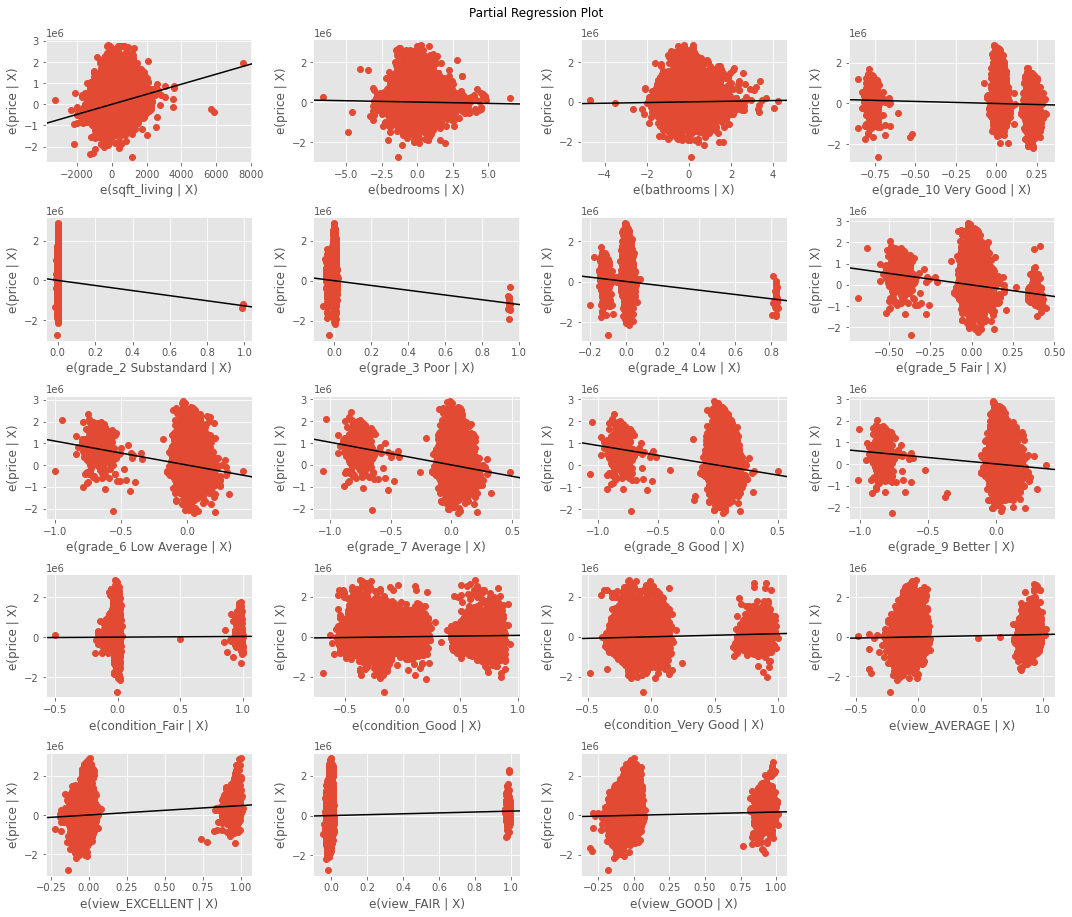

In [31]:
#look at regression plots
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    model_results,
    exog_idx=list(X.columns.values),
    grid=(6,4),
    fig=fig)
plt.show()

### Model Error

In [32]:
#Calculating mean absolute error
from sklearn.metrics import mean_absolute_error

y_pred = model_results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

301199.00177649205

*For housing prices, an error of 306k seems like a lot. Remember that the average house is 1.1 million USD. This error shows the limitation of the model.* 

## Results
***

Results and Interpretation:
* The final model explains about 51% of the variance in price. 
* The model overall is significant at an alpha level of 0.05. The constant and all predictors except fair condition are significant. 
* For every square foot of living space the couple can expect to add 237 USD all else constant. 
* For each bedroom the price goes down about 13K USD all else constant. 
* For every bathroom the price increases about 17K USD all else constant. 
* When compared to a grade of 1, increasing the grade to 7-10, decreases the cost of the house. This seems off. However, when comparing the coefficents of grades 7-10, the model shows that the house price would increase in the hundreds of thousands with each increase in grade. The increase in price with the increase in grade is expected. Going from a good to a better grade house, the price increase is about 306K USD all else constant. Going from a better to a very good grade house, the price increase is an additional 329K USD all else constant. 
* For a house in good condition, the price will go up 72K USD compared to a house in poor condition all else constant. A house in very good condition will be about 156K USD more than a house in poor condition all else constant. 
* For a house with a fair view, the price goes up 222K, for an average view the price will go up about 121K, for a good view the price goes up about 164K, and for an excellent view the price will go up 479K USD compared to no view all else constant. 


## Conclusions
***


According to the model, the real estate agent should help the couple look for a house with more bedrooms and fewer bathrooms. Depending on what they are comfortable with, a lower grade house in better condition could save more money than a higher grade house. Views can be expensive, but going for a good view is only a little more in cost than an average view and a lot cheaper than an excellent view. Of course, this is only the trend the model is seeing, and the model is only explaining about 51% of the variation in price. Given that the model has a relatively high mean absolute error, 301K, the model should only be used as a loose guide to help the couple with their expectations on home prices. 

My next steps would be to look at other variables such as zipcodes to see how they affect housing prices.  Ideally, an increase in model accuracy is needed before the model can produce solid recommendations. 